# Detecting the Breast Cancer 

## Data from UCI ML Repository https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as ppt

# display graphs in between cells
%matplotlib inline

In [2]:
%%time

# read excel file using pandas
df=pd.read_excel(r"C:\\Users\\Murali\\PycharmProjects\\Sample1\\breastCancer.xlsx")
df.head(5)

Wall time: 237 ms


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# column data types 
df.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [4]:
# Now Check & count (null,na,nan) values in columns
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

# IMP point in data cleaning check data correctly parsed? 

## incase data not correctly parsed follow below steps.

### df["Bare Nuclei"] values are numerical but object data type showing (main reason - prase problem (other than numerical values in columns present)) 

In [5]:
%%time
# set 1 using to_numeric function
    # converting data type for  specific column('Bare Nuclei')

    # df['Bare Nuclei']=pd.to_numeric(df['Bare Nuclei'], errors='coerce')
    # df['Bare Nuclei'].fillna(df['Bare Nuclei'].mean(),inplace=True)
    # errors=coerce’ in to_numerica(), then invalid parsing will be set as NaN

# converting data type for total data frame
    # df.apply(lambda s: pd.to_numeric(s,errors='coerce').notnull().all())


# set 2 using astype function
    # while using astype 1 st we need to replace other than numerica value(like ab,.;?) with nan value in column
    # now we nned to change nan value with mean of column or 0 ..based on requirment 
    # than apply astype function 
df['Bare Nuclei'].replace({'?':np.nan},inplace=True)
df['Bare Nuclei'].fillna(df['Bare Nuclei'].mean(),inplace=True)
df['Bare Nuclei']=df['Bare Nuclei'].astype(np.int64)#mean values float64 but need int64 so change to int64 we use np

Wall time: 4 ms


In [6]:
# now check the Bare Nuclei column data type
df['Bare Nuclei'].dtype

dtype('int64')

In [7]:
# drop Column unwanted like (NAN,na,nan,Nan)
# df.dropna(axis=1)  
# axis=1 means it performe operation in column wise not null

# count number of malognant & bengin
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

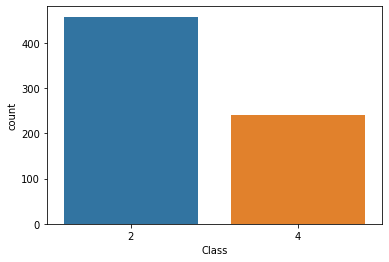

In [8]:
# visualize the Count of Class column in data set through Seaborn
sns.countplot(df['Class'],label='count')

In [9]:
# lable encoder for class column 
# import sklearn preprocessong for encode 
from sklearn.preprocessing import LabelEncoder

# Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form
labelencoder_y=LabelEncoder()
df.iloc[:,10]=labelencoder_y.fit_transform(df.iloc[:,10].values)

# view 10th column values (class column values after label encoder)
df.iloc[:,10]

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 699, dtype: int64

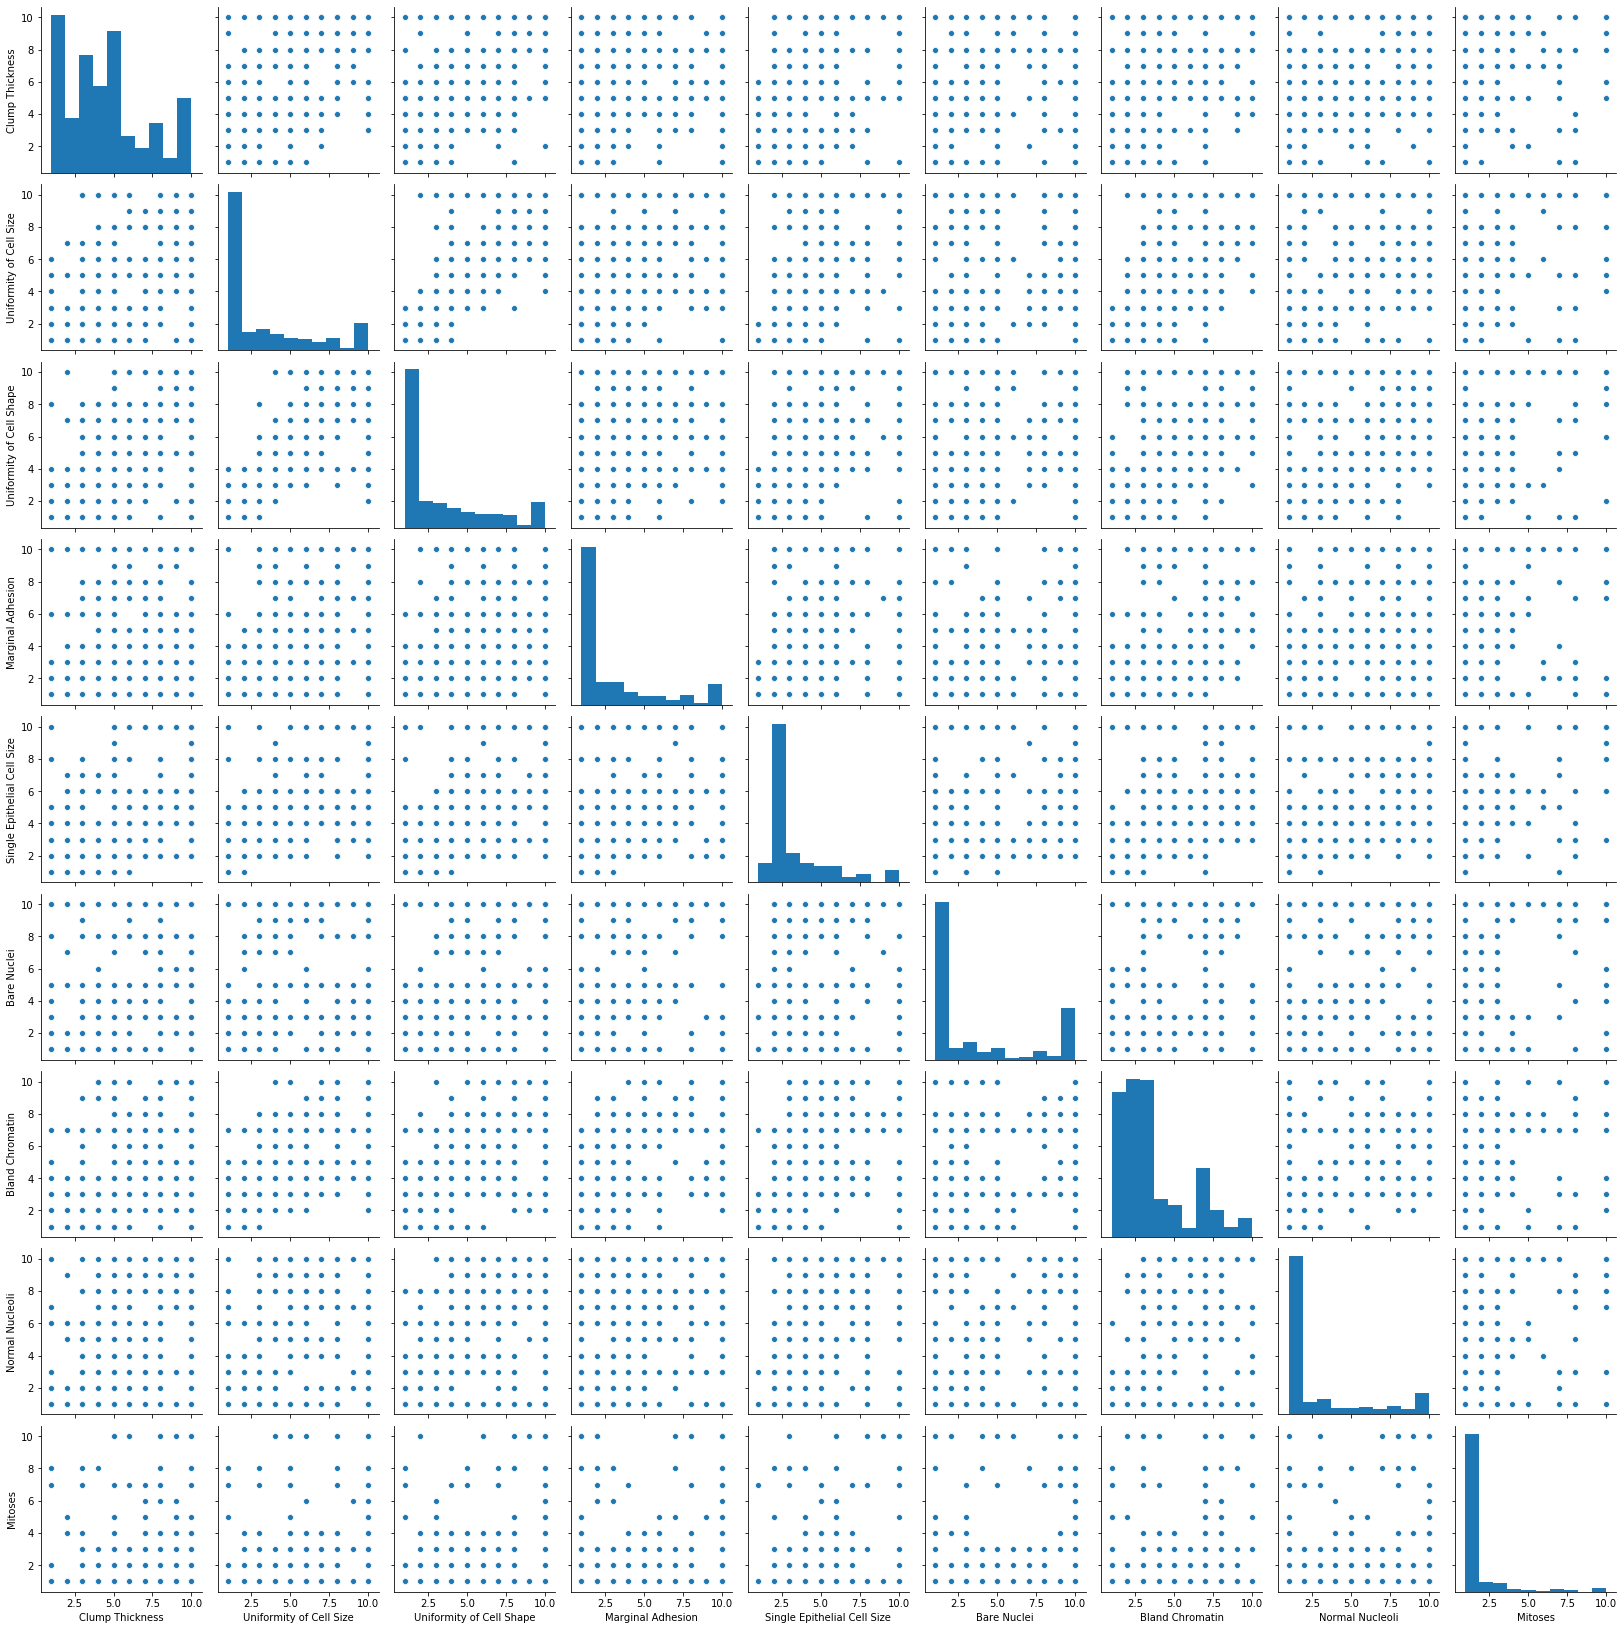

In [10]:
# pair plot using seaborn
sns.pairplot(df.iloc[:,1:10])

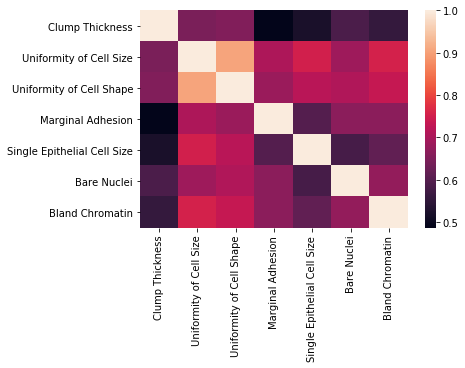

In [14]:
#df.isna().count()
#df.iloc[:,1:11].corr()
# generate heap map using seaborn
sns.heatmap(df.iloc[:,1:8].corr())

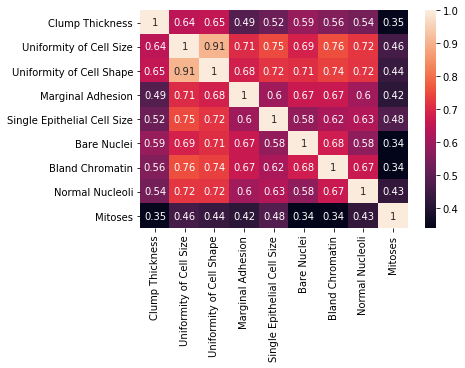

In [15]:
# get heatmap value in each portion, by adding one attribte "annot" in heapmap
sns.heatmap(df.iloc[:,1:10].corr() ,annot=True)

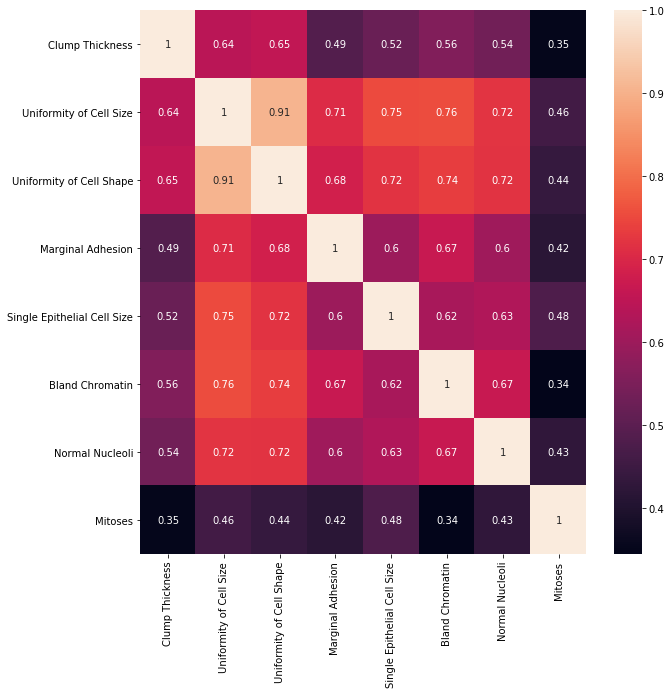

In [17]:
# now change the heapmap figure size
ppt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:10].corr(),annot=True)

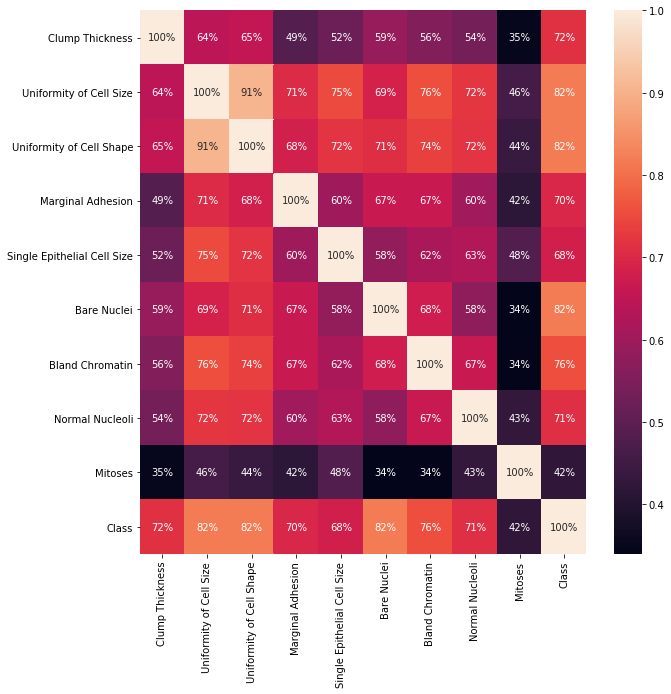

In [16]:
# if u want percentage in portion size that add attribute fmrt='.0%' in heatmap
ppt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:11].corr(),annot=True,fmt='.0%')

In [17]:
#sklearn
# split the data into independent(class) & dependent 
x=df.iloc[:,1:10].values
y=df.iloc[:,10].values

# split the data into training & testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [20]:
# feature scaling
from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)

In [25]:
# create function for models (models logistic regression, decision tree,)

def models(X_train,y_train):
    
    # Logistic regression LR
    from sklearn.linear_model import LogisticRegression
    log= LogisticRegression(random_state=0)
    log.fit(X_train,y_train)
    print("Logistic Regression",log.score(X_train,y_train))
    
    # Decision tree DT
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train,y_train)
    print("Decision Tree",tree.score(X_train,y_train))
    
    # Random forest RF
    from sklearn.ensemble import RandomForestClassifier
    rfc =RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    rfc.fit(X_train,y_train)
    print("Random Forest",rfc.score(X_train,y_train))
    
    #print(log.score(X_train,y_train),tree.score(X_train,y_train),rfc.score(X_train,y_train))
    
    return log,tree,rfc
# call function models(**)
model=models(X_train,y_train)


0.9713740458015268
1.0
0.9961832061068703
0.9713740458015268 1.0 0.9961832061068703


In [30]:
#testing data 
from sklearn.metrics import confusion_matrix

cmlog=confusion_matrix(y_test,model[0].predict(X_test))
cmdt=confusion_matrix(y_test,model[1].predict(X_test))
cmrfc=confusion_matrix(y_test,model[2].predict(X_test))


print("Confusion matrix Logistic Regression",cmlog,"\n Confusion matrix Decision Tree",cmdt,"\n Confusion matrix Random Forest",cmrfc)


[[109   3]
 [  3  60]] 
 [[107   5]
 [  6  57]] 
 [[110   2]
 [  4  59]]


In [32]:
# Show 1st returned value from models function
print(model[0])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [33]:
# accuracy detection from confusion matrix for linaer regression

TP=cmlog[0][1] # true  positive
TN=cmlog[1][1] # true  negative
FN=cmlog[1][0] # false negative
FP=cmlog[0][1] # false positive


print("Accuracy of Linear Regression",(TP+TN)/(TP+TN+FN+FP))

Accuracy 0.9130434782608695


In [39]:
# accuracy detection from confusion matrix (for used models LR,DT,RF) 

for i in range (len(model)):
    cm=confusion_matrix(y_test,model[i].predict(X_test))
    print(f"model[{i}]\n",cm)
    TP=cm[0][1]
    TN=cm[1][1]
    FN=cm[1][0]
    FP=cm[0][1]
    print("Accuracy",(TP+TN)/(TP+TN+FN+FP))



model[0]
 [[109   3]
 [  3  60]]
model[0] Accuracy 0.9130434782608695
model[1]
 [[107   5]
 [  6  57]]
model[1] Accuracy 0.8493150684931506
model[2]
 [[110   2]
 [  4  59]]
model[2] Accuracy 0.9104477611940298


In [42]:
# we have funcion to get accuracy macro avg  weighted 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Linear Regression")
print(classification_report(y_test,model[0].predict(X_test)))
print(accuracy_score(y_test,model[0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       112
           1       0.95      0.95      0.95        63

    accuracy                           0.97       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175

0.9657142857142857


In [43]:
# accuracy score based on test data
print(accuracy_score(y_test,model[0].predict(X_test)))

0.9657142857142857
